# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **import library** yang digunakan
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('seattle-weather.csv')

In [3]:
print(df.head(15))

          date  precipitation  temp_max  temp_min  wind  weather
0   2012-01-01            0.0      12.8       5.0   4.7  drizzle
1   2012-01-02           10.9      10.6       2.8   4.5     rain
2   2012-01-03            0.8      11.7       7.2   2.3     rain
3   2012-01-04           20.3      12.2       5.6   4.7     rain
4   2012-01-05            1.3       8.9       2.8   6.1     rain
5   2012-01-06            2.5       4.4       2.2   2.2     rain
6   2012-01-07            0.0       7.2       2.8   2.3     rain
7   2012-01-08            0.0      10.0       2.8   2.0      sun
8   2012-01-09            4.3       9.4       5.0   3.4     rain
9   2012-01-10            1.0       6.1       0.6   3.4     rain
10  2012-01-11            0.0       6.1      -1.1   5.1      sun
11  2012-01-12            0.0       6.1      -1.7   1.9      sun
12  2012-01-13            0.0       5.0      -2.8   1.3      sun
13  2012-01-14            4.1       4.4       0.6   5.3     snow
14  2012-01-15           

2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [4]:
# Mengecek nilai kosong
missing_values = df.isnull().sum()
print("Jumlah nilai kosong untuk setiap kolom:")
print(missing_values)

Jumlah nilai kosong untuk setiap kolom:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [5]:
# Menghapus nilai kosong
df.dropna(inplace=True)

In [6]:
# Menghapus kolom "date"
df.drop(columns=['date'], inplace=True)

In [7]:
# Mengecek data yang memiliki nilai duplikat
duplicate_rows = df[df.duplicated()]
print("Data yang memiliki nilai duplikat:")
print(duplicate_rows)

Data yang memiliki nilai duplikat:
      precipitation  temp_max  temp_min  wind weather
188             0.0      26.7      12.8   3.8     sun
629             0.0      21.1      13.3   2.5     sun
748             0.0       9.4       0.6   2.2     sun
751             0.0      10.0       1.7   1.5     sun
863             0.0      26.7      12.8   3.8     sun
959             0.0      27.8      15.0   2.8     sun
1019            0.0      20.6      11.1   3.3     sun
1346            0.0      22.8      13.3   2.4     sun


In [8]:
# Menghapus data yang memiliki nilai duplikat
df.drop_duplicates(inplace=True)

In [9]:
# Menampilkan 15 baris data teratas setelah proses preprocessing
print(df.head(15))

    precipitation  temp_max  temp_min  wind  weather
0             0.0      12.8       5.0   4.7  drizzle
1            10.9      10.6       2.8   4.5     rain
2             0.8      11.7       7.2   2.3     rain
3            20.3      12.2       5.6   4.7     rain
4             1.3       8.9       2.8   6.1     rain
5             2.5       4.4       2.2   2.2     rain
6             0.0       7.2       2.8   2.3     rain
7             0.0      10.0       2.8   2.0      sun
8             4.3       9.4       5.0   3.4     rain
9             1.0       6.1       0.6   3.4     rain
10            0.0       6.1      -1.1   5.1      sun
11            0.0       6.1      -1.7   1.9      sun
12            0.0       5.0      -2.8   1.3      sun
13            4.1       4.4       0.6   5.3     snow
14            5.3       1.1      -3.3   3.2     snow


## **Visualisasi**

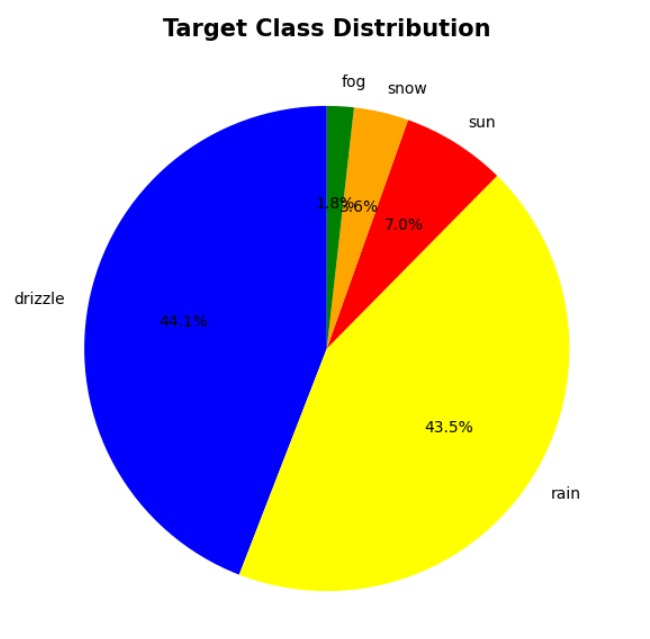

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

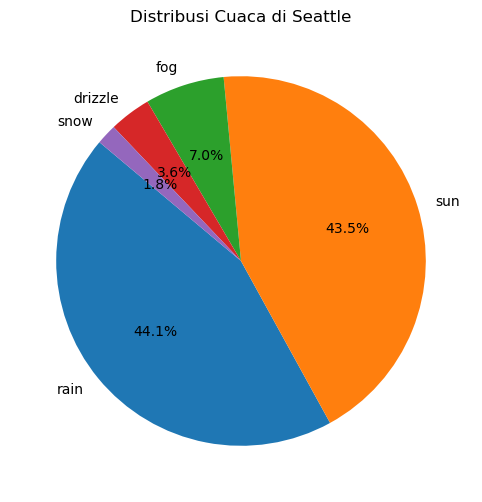

In [10]:
# Menghitung jumlah setiap kategori cuaca
weather_counts = df['weather'].value_counts()

# Visualisasi distribusi cuaca menggunakan diagram pie
plt.figure(figsize=(8, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Cuaca di Seattle')
plt.show()

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.


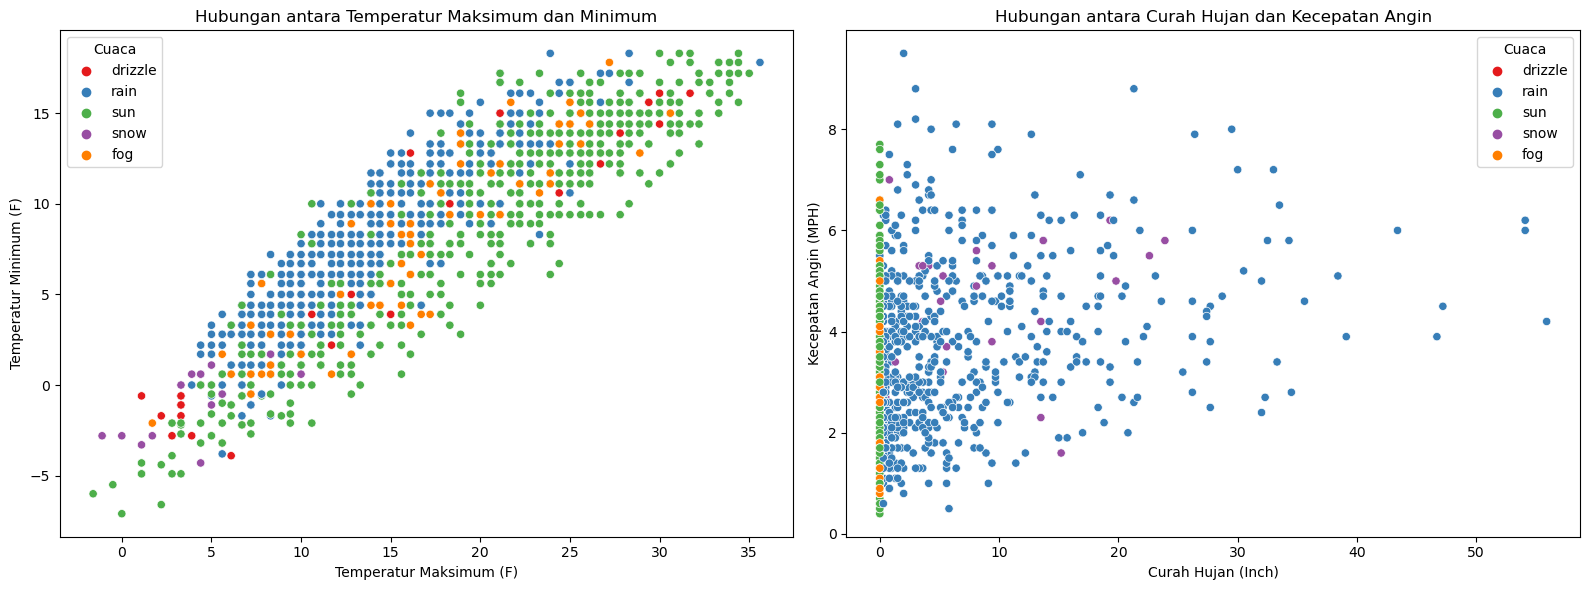

In [11]:
# Visualisasi relasi antar fitur menggunakan diagram scatter
# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Diagram Scatter 1
sns.scatterplot(x='temp_max', y='temp_min', hue='weather', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Hubungan antara Temperatur Maksimum dan Minimum')
axes[0].set_xlabel('Temperatur Maksimum (F)')
axes[0].set_ylabel('Temperatur Minimum (F)')
axes[0].legend(title='Cuaca')

# Diagram Scatter 2
sns.scatterplot(x='precipitation', y='wind', hue='weather', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Hubungan antara Curah Hujan dan Kecepatan Angin')
axes[1].set_xlabel('Curah Hujan (Inch)')
axes[1].set_ylabel('Kecepatan Angin (MPH)')
axes[1].legend(title='Cuaca')

# Menampilkan plot
plt.tight_layout()
plt.show()

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [12]:
from sklearn.model_selection import train_test_split

# Membaca dataset 'seattle-weather' menggunakan Pandas
df = pd.read_csv('seattle-weather.csv')

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['weather'])  # Seluruh kolom kecuali kolom 'weather'
y = df['weather']  # Kolom target

# Membagi dataset menjadi train set dan test set dengan rasio 70% train-set dan 30% test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran dari train set dan test set
print("Ukuran train set:", X_train.shape[0])
print("Ukuran test set:", X_test.shape[0])

Ukuran train set: 1022
Ukuran test set: 439


6. Buatlah **diagram pie** untuk data train dan data test seperti gambaer dibawah ini

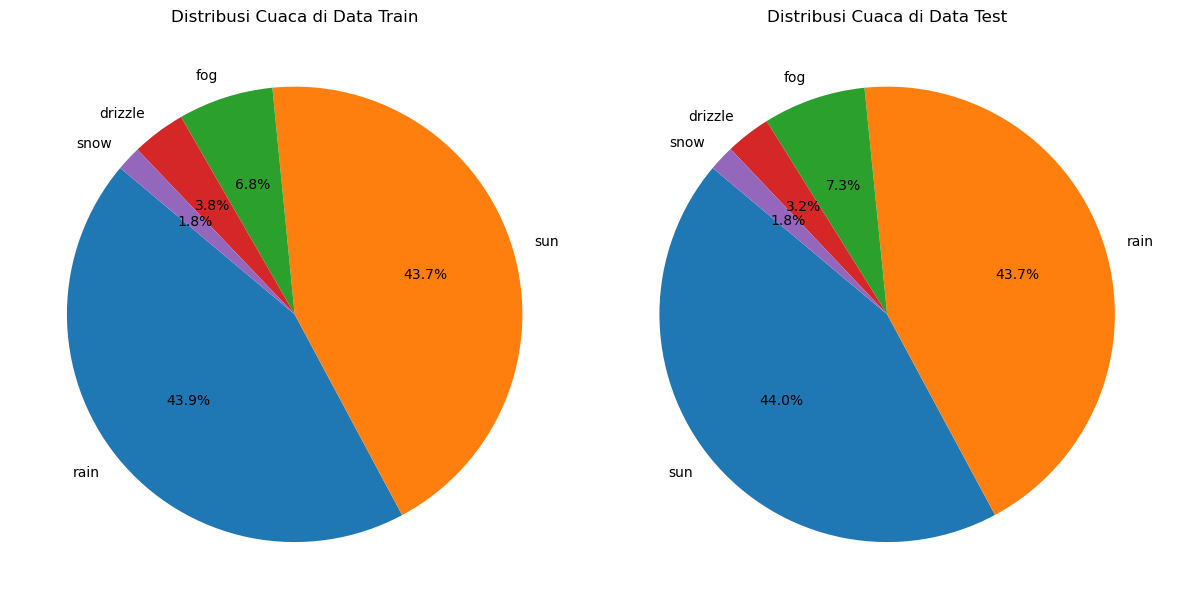

In [13]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengubah kategori cuaca menjadi angka
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['weather', 'weather_encoded'])  # Seluruh kolom kecuali kolom 'weather'
y = df['weather_encoded']  # Kolom target

# Membagi dataset menjadi train set dan test set dengan rasio 70% train-set dan 30% test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menghitung jumlah kemunculan setiap kategori cuaca di data train dan data test
train_weather_counts = y_train.value_counts()
test_weather_counts = y_test.value_counts()

# Membuat label untuk diagram pie berdasarkan mapping encoding
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
train_weather_labels = train_weather_counts.index.map(label_mapping)
test_weather_labels = test_weather_counts.index.map(label_mapping)

# Membuat diagram pie untuk data train
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(train_weather_counts, labels=train_weather_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Cuaca di Data Train')

# Membuat diagram pie untuk data test
plt.subplot(1, 2, 2)
plt.pie(test_weather_counts, labels=test_weather_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Cuaca di Data Test')

# Menampilkan plot
plt.tight_layout()
plt.show()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Membuang kolom non-numerik
df_numeric = df.drop(columns=['date', 'weather'])

# Menggunakan OneHotEncoder untuk mengubah kolom 'weather' menjadi representasi numerik
onehot_encoder = OneHotEncoder()
weather_encoded = onehot_encoder.fit_transform(df[['weather']])

# Menggabungkan data yang telah diubah dengan kolom 'weather' yang telah di-encoded
df_encoded = pd.concat([df_numeric, pd.DataFrame(weather_encoded.toarray(), columns=onehot_encoder.categories_[0])], axis=1)

# Memisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['weather_encoded'])  # Seluruh kolom kecuali kolom 'weather_encoded'
y = df_encoded['weather_encoded']  # Kolom target

# Membagi dataset menjadi train set dan test set dengan rasio 70% train-set dan 30% test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Melatih model pada data train
model.fit(X_train, y_train)

# Melakukan prediksi terhadap data test
y_pred = model.predict(X_test)

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [15]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

Akurasi model: 1.0


## **Kesimpulan**

9. Berikan kesimpulan dari project yang telah anda buat.

_Tulis **jawaban** no. 9 disini_

Dengan hasil akurasi model yang sempurna, yaitu 1.0, kita dapat menyimpulkan bahwa model Decision Tree Classifier sangat efektif dalam memprediksi cuaca di Seattle berdasarkan fitur-fitur yang ada dalam dataset. Akurasi tersebut menunjukkan bahwa model mampu mengklasifikasikan cuaca dengan sempurna berdasarkan informasi yang tersedia. Dengan demikian, kita memiliki keyakinan tinggi bahwa model dapat memberikan prediksi yang sangat akurat tentang cuaca di masa depan. Dalam konteks ini, tidak diperlukan penyesuaian tambahan pada model atau fitur, karena kinerjanya telah mencapai tingkat yang optimal.

10. Upload Project anda kedalam link **Google Drive** berikut